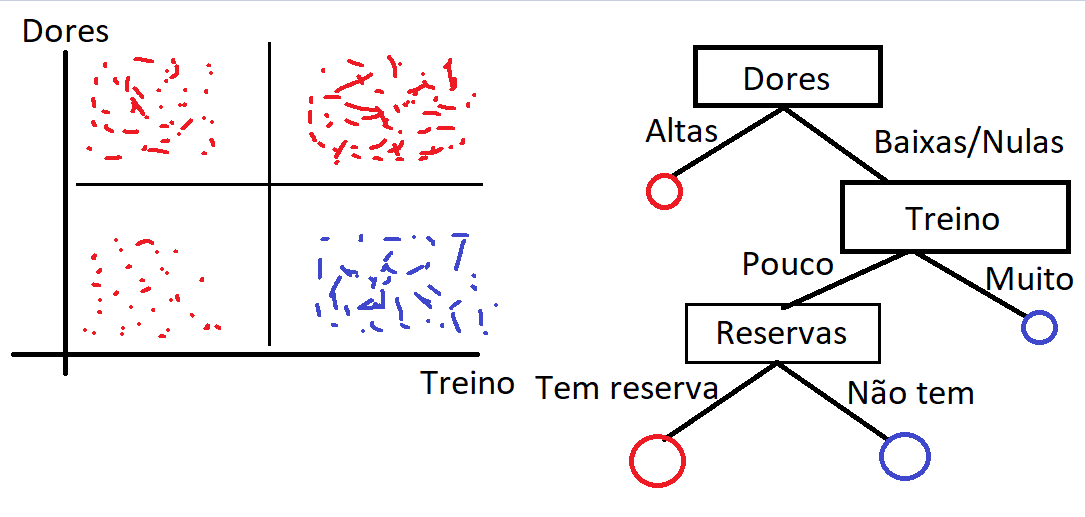

# Cálculo da Entropia

Mensura a quantidade de desordem em um sistema

// Pode ser interpretado como o desvio padrão...


$$
\text{Entropia = }
E(s) = -\sum_{i=1} p_i\space \log_{2} (p_i)

$$
Sendo: 

$p_i$ a propabilidade para cada caso.

E(s) = 1 -> Dados mais equilibrados

E(s) = 0 -> Dados mais dispersos

## Exemplo

| Dores | Treino | Substituto | Resultado   |
|-------|--------|------------|-----|
| Sim   | Muito  | Não        | Não |
| Sim   | Pouco  | Não        | Não |
| Sim   | Muito  | Sim        | Não |
| Sim   | Pouco  | Sim        | Não |
| Não   | Muito  | Não        | Sim |
| Não   | Pouco  | Não        | Sim |
| Não   | Muito  | Sim        | Sim |
| Não   | Pouco  | Sim        | Não |


pn (propabilidade para 'não') = 5/8

ps (propabilidade para 'sim') = 3/8



In [2]:
import math

In [5]:
round(math.log(5/8, 2), 2)

-0.68

In [6]:
round(math.log(3/8, 2), 2)

-1.42

In [8]:
entropia = -1*(5/8*math.log(5/8, 2) + 3/8*math.log(3/8, 2))
round(entropia, 2)

0.95

# Cálculo do ganho de informação 

Vai decidir quem são os pais e os filhos da árvore de decisão, vai definir a estrutura da árvore.

$$

Gain(S, A) = \text{Entropia(s)} - \sum \text{pesos} \cdot \text{Entropia(A)}

$$

Sendo: 

pesos: número de amostra para filho para cada ramo / número de amostra do pai

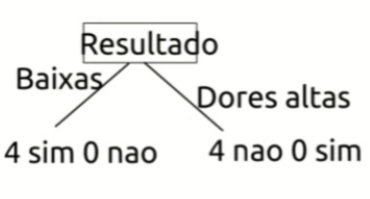

### Calcular a entropia para cada ramo

In [11]:
entropia_ramo_baixa = 4/4*math.log(4/4, 2)
print(entropia_ramo_baixa)

entropia_ramo_alta = 4/4*math.log(4/4, 2)
print(entropia_ramo_alta)

0.0
0.0


In [12]:
peso_baixa = (4 + 0) / 8  # (4 'sim' + 0 'não') # 8 -> quantidade de ocorrencias totais

In [13]:
peso_alta = (0 + 4) / 8

In [15]:
gain = entropia - (peso_baixa*entropia_ramo_baixa + peso_alta*entropia_ramo_alta)
gain

1.0

Coluna 'Dores' teve gain = 1.0, suponto que a coluna 'Substituto' tenha um gain = 0.8, entao a coluna 'Dores' é mais relavante para a Árvore de Decisão do que a coluna 'Substituto'.

# 26 - Implementação da Árvore de Decisão

In [16]:
from sklearn import tree

Dados: 

Dores/sim = 0, Não = 1, 

Treino/muito = 0, Pouco = 1, 

Substituto/sim = 0, 

R/não = 1, sim = 0

In [ ]:
# x_treino = [0, 0, 1] -> 0: Tenho Dores, 0: Treinei Muito, 1: Não tenho substituto
# y_treino = 1 -> 1: Não vou jogar

In [17]:
x_treino = [[0, 0, 1],
            [0, 1, 1],
            [0, 0, 0],
            #[0, 1, 0], linha para teste
            [1, 0, 1], 
            [1, 1, 1],
            [1, 0, 0],
            #[1, 1, 1], linha para teste
            ]

y_treino = [
            1,
            1,
            1,
            #1 linha teste,
            0,
            0,
            0,
            #0 linha teste
]

In [21]:
x_teste = [
           [0, 1, 0],
           [1, 1, 0]
          ]

y_teste = [
           1,
           0
          ]

In [22]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
arvore.predict(x_teste) # Esperado = y_teste

array([1, 0])

In [28]:
arvore.feature_importances_ # 1: Dores -> Importancia maxima, 0 e 0: não importa

array([1., 0., 0.])